In [1]:
import matplotlib.pyplot as plt
import numpy as np


def draw_graph(
    title: str,
    X_label: str,
    Y_label: str,
    Y1_label: str,
    Y2_label: str,
    X: list[str],
    Y1: list[float],
    Y2: list[float],
    logscale: bool,
    Y_unit: str,
    save_to_file: bool,
    margin_top: float = 1.25,
) -> None:
    x_range = np.arange(len(X))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 8))

    bars1 = ax.bar(x_range - width/2 - 0.02, Y1, width, label=Y1_label, color='#9b59b6')
    bars2 = ax.bar(x_range + width/2 + 0.02, Y2, width, label=Y2_label, color='#7fcdcd')

    ax.set_title(title, fontsize=22, pad=16, linespacing=1.5)
    ax.set_ylabel(Y_label, fontsize=18, labelpad=10)
    ax.set_xlabel(X_label, fontsize=18, labelpad=10)
    ax.set_xticks(x_range)
    ax.tick_params(axis='both', labelsize=16, pad=4)
    ax.set_xticklabels(X)
    if logscale:
        ax.set_yscale("log")

    ax.legend(fontsize=20)

    if not logscale:
        max_y = max(max(Y1), max(Y2))
        ax.set_ylim(0, max_y * margin_top)

    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height}{Y_unit}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()

    if save_to_file:
        plt.savefig(f'{title}.png', dpi=300)

    plt.show()


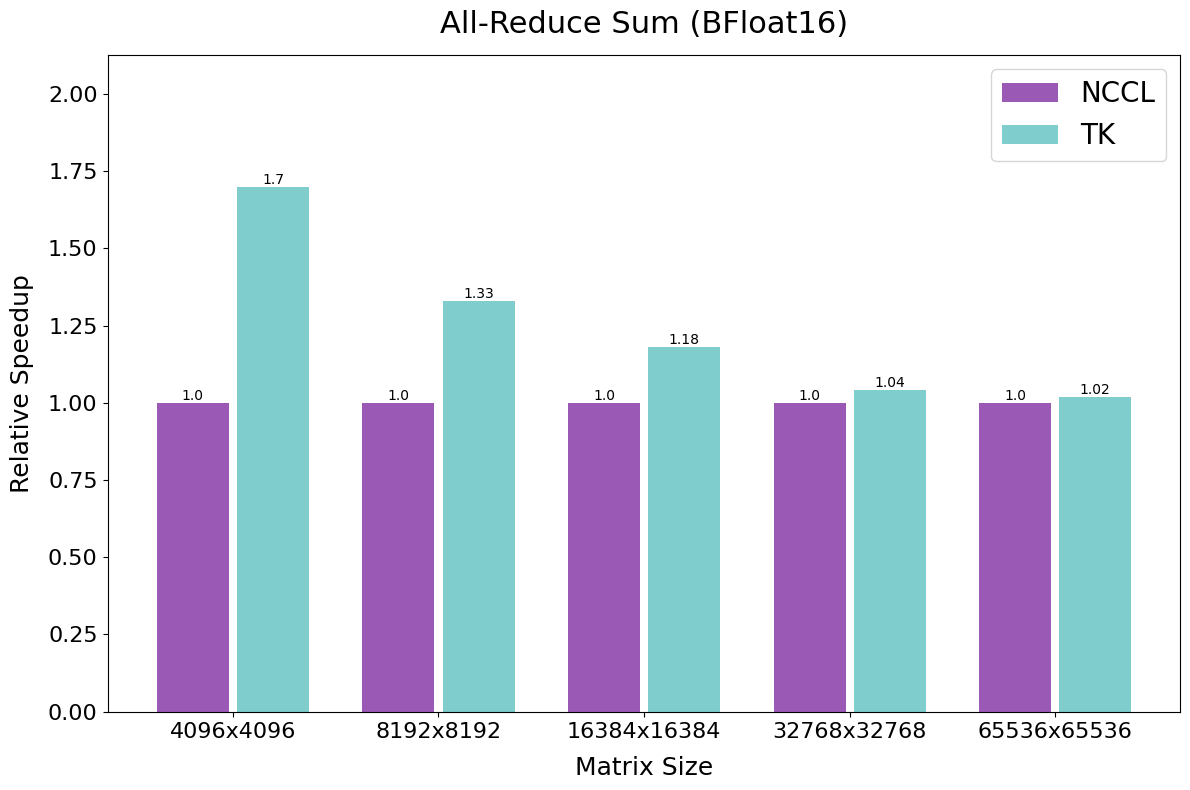

In [2]:
title = "All-Reduce Sum (BFloat16)"

X_label = 'Matrix Size'
Y_label = 'Time (ms)'
Y1_label = 'NCCL'
Y2_label = 'TK'

X = ['4096x4096', '8192x8192', '16384x16384', '32768x32768', '65536x65536']
Y1 = [0.17, 0.4, 1.33, 4.6, 17.93]
Y2 = [0.1, 0.3, 1.13, 4.42, 17.57]

logscale = True
Y_unit = 'ms'
save_to_file = True

##### Relative #####
logscale = False
Y2 = [round(y1 / y2, 2) for y1, y2 in zip(Y1, Y2)]
Y1 = [1.00] * len(Y1)
Y_unit = ''
Y_label = 'Relative Speedup'

draw_graph(title, X_label, Y_label, Y1_label, Y2_label, X, Y1, Y2, logscale, Y_unit, save_to_file)

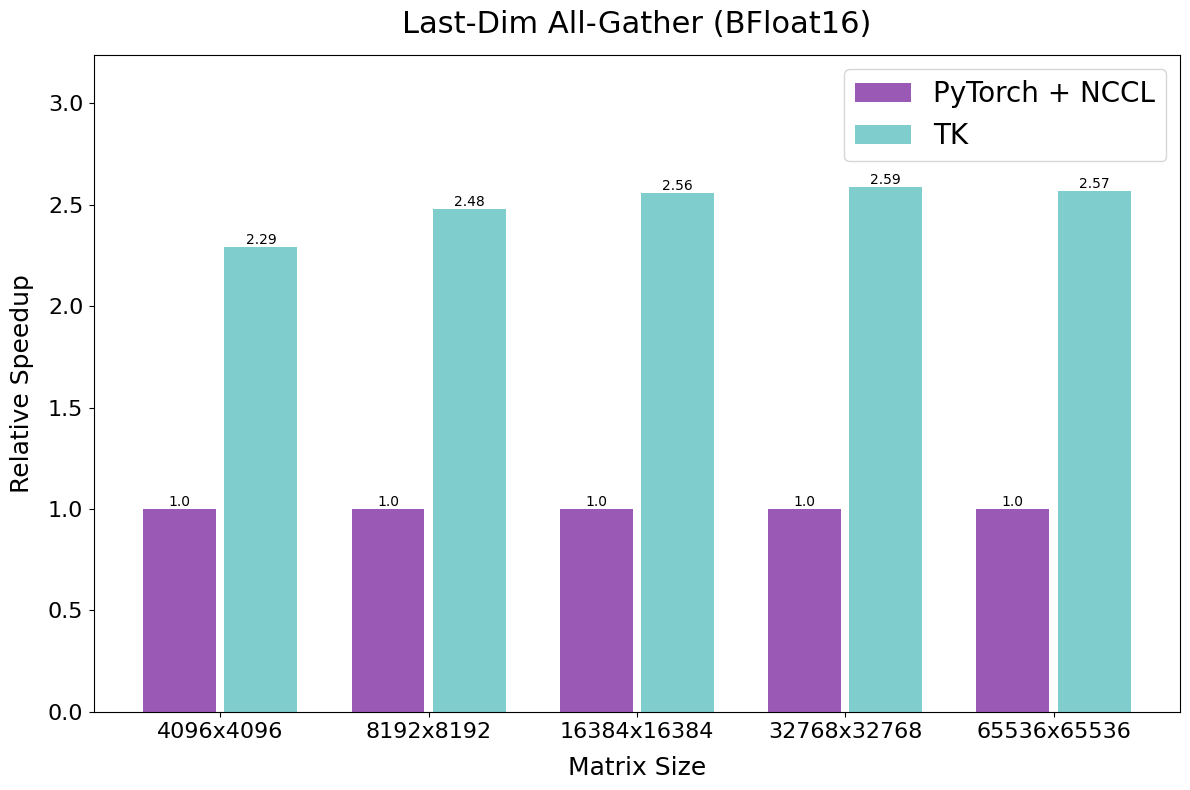

In [3]:
title = "Last-Dim All-Gather (BFloat16)"

X_label = 'Matrix Size'
Y_label = 'Time (ms)'
Y1_label = 'PyTorch + NCCL'
Y2_label = 'TK'

X = ['4096x4096', '8192x8192', '16384x16384', '32768x32768', '65536x65536']
Y1 = [0.16, 0.52, 2.02, 7.80, 30.75]
Y2 = [0.07, 0.21, 0.79, 3.01, 11.98]

logscale = True
Y_unit = 'ms'

##### Relative #####
logscale = False
Y2 = [round(y1 / y2, 2) for y1, y2 in zip(Y1, Y2)]
Y1 = [1.00] * len(Y1)
Y_unit = ''
Y_label = 'Relative Speedup'

draw_graph(title, X_label, Y_label, Y1_label, Y2_label, X, Y1, Y2, logscale, Y_unit, True)

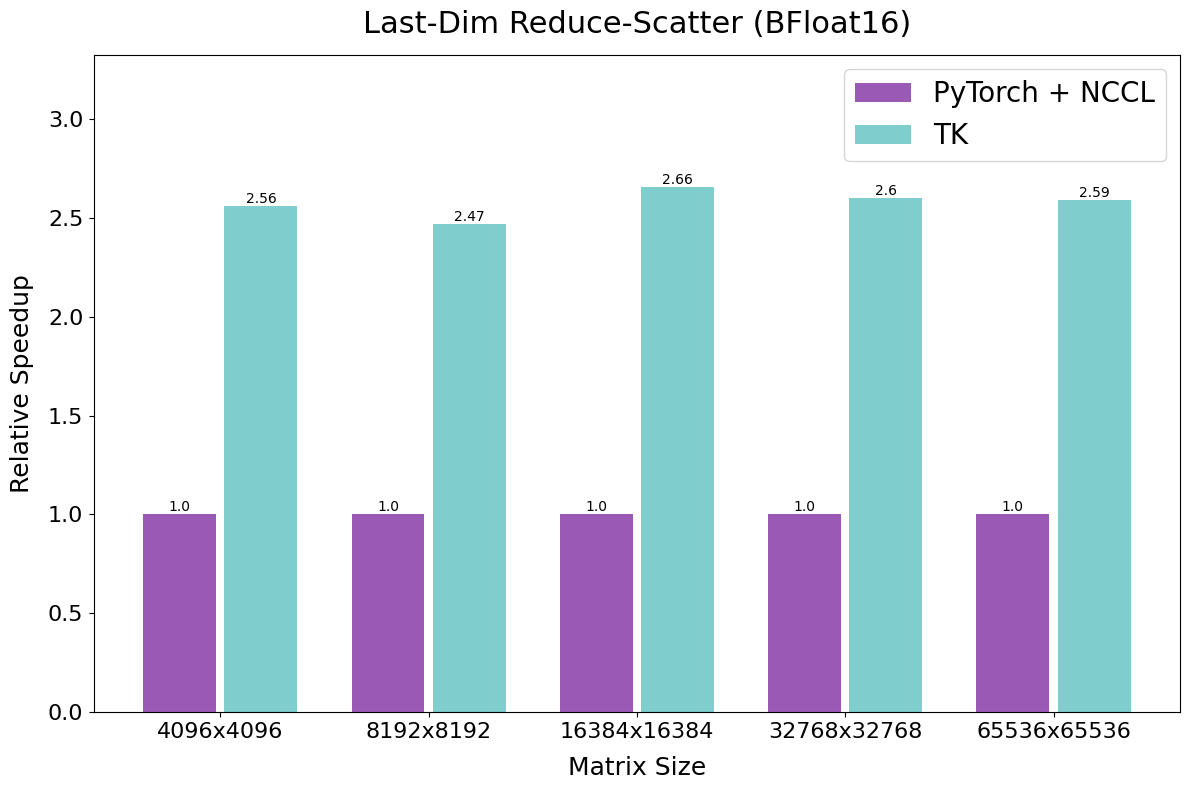

In [4]:
title = "Last-Dim Reduce-Scatter (BFloat16)"

X_label = 'Matrix Size'
Y_label = 'Time (ms)'
Y1_label = 'PyTorch + NCCL'
Y2_label = 'TK'

X = ['4096x4096', '8192x8192', '16384x16384', '32768x32768', '65536x65536']
Y1 = [0.174, 0.519, 2.021, 7.722, 30.492]
Y2 = [0.068, 0.210, 0.760, 2.975, 11.789]

logscale = True
Y_unit = 'ms'

##### Relative #####
logscale = False
Y2 = [round(y1 / y2, 2) for y1, y2 in zip(Y1, Y2)]
Y1 = [1.00] * len(Y1)
Y_unit = ''
Y_label = 'Relative Speedup'

draw_graph(title, X_label, Y_label, Y1_label, Y2_label, X, Y1, Y2, logscale, Y_unit, True)

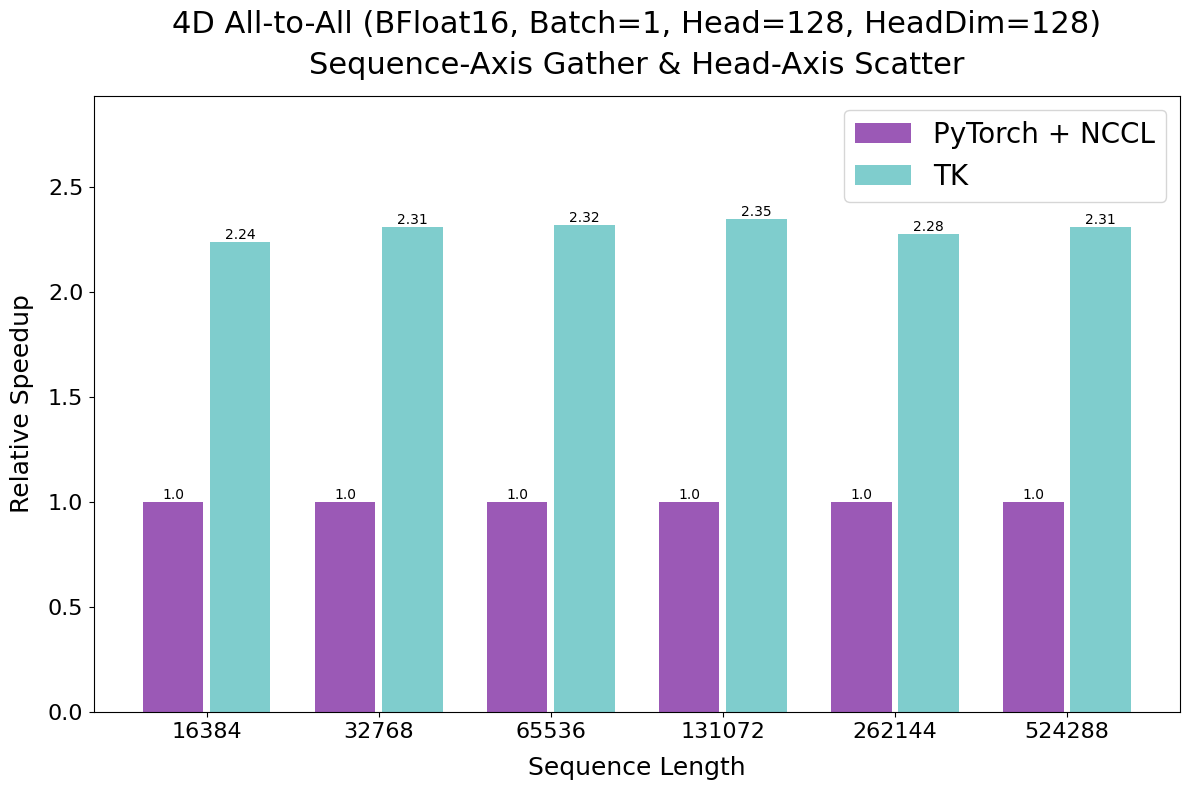

In [5]:
title = "4D All-to-All (BFloat16, Batch=1, Head=128, HeadDim=128)\nSequence-Axis Gather & Head-Axis Scatter"

X_label = 'Sequence Length'
Y_label = 'Time (ms)'
Y1_label = 'PyTorch + NCCL'
Y2_label = 'TK'

X = ['16384', '32768', '65536', '131072', '262144', '524288']
Y1 = [0.244, 0.443, 0.838, 1.631, 3.106, 6.226]
Y2 = [0.109, 0.192, 0.361, 0.694, 1.362, 2.698]

logscale = True
Y_unit = 'ms'

##### Relative #####
logscale = False
Y2 = [round(y1 / y2, 2) for y1, y2 in zip(Y1, Y2)]
Y1 = [1.00] * len(Y1)
Y_unit = ''
Y_label = 'Relative Speedup'

draw_graph(title, X_label, Y_label, Y1_label, Y2_label, X, Y1, Y2, logscale, Y_unit, True)

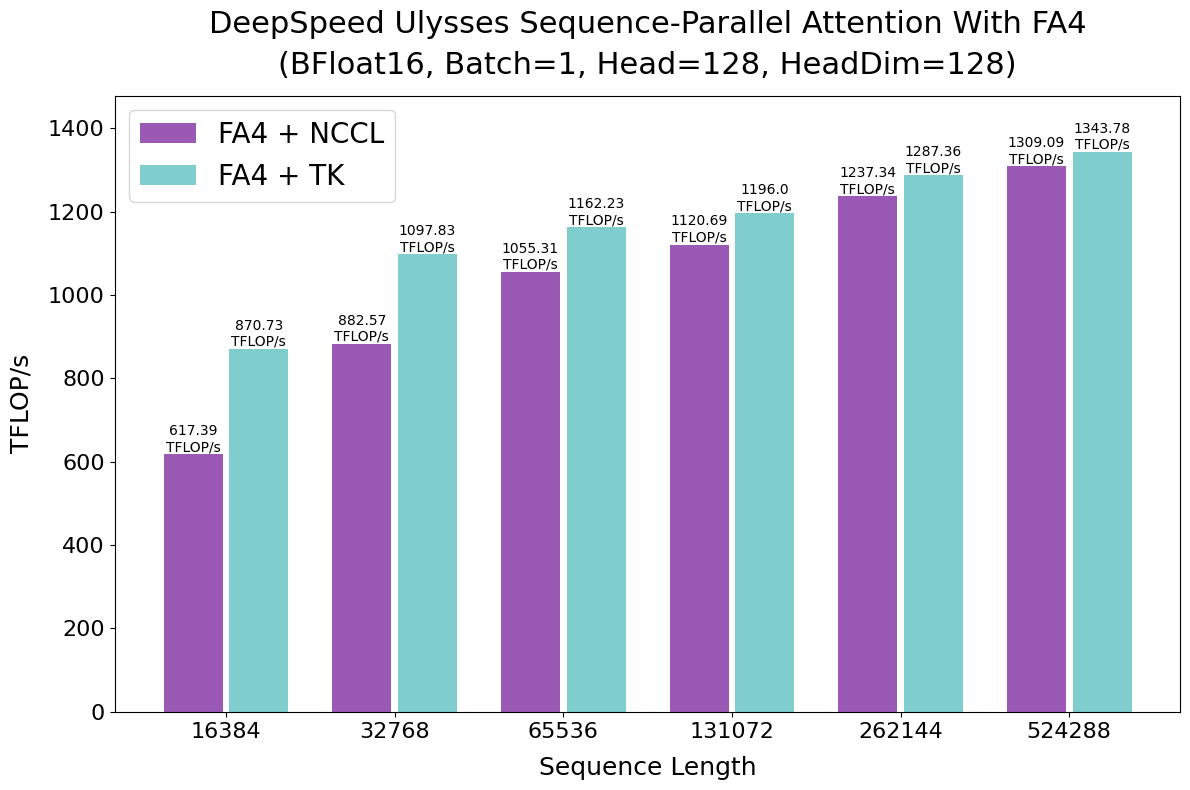

In [6]:
title = "DeepSpeed Ulysses Sequence-Parallel Attention With FA4\n(BFloat16, Batch=1, Head=128, HeadDim=128)"

X_label = 'Sequence Length'
Y_label = 'TFLOP/s'
Y1_label = 'FA4 + NCCL'
Y2_label = 'FA4 + TK'

X = [16384, 32768, 65536, 131072, 262144, 524288]
Y1 = [617.39, 882.57, 1055.31, 1120.69, 1237.34, 1309.09]
Y2 = [870.73, 1097.83, 1162.23, 1196.00, 1287.36, 1343.78]

logscale = False
Y_unit = '\nTFLOP/s'

draw_graph(title, X_label, Y_label, Y1_label, Y2_label, X, Y1, Y2, logscale, Y_unit, True, margin_top=1.1)

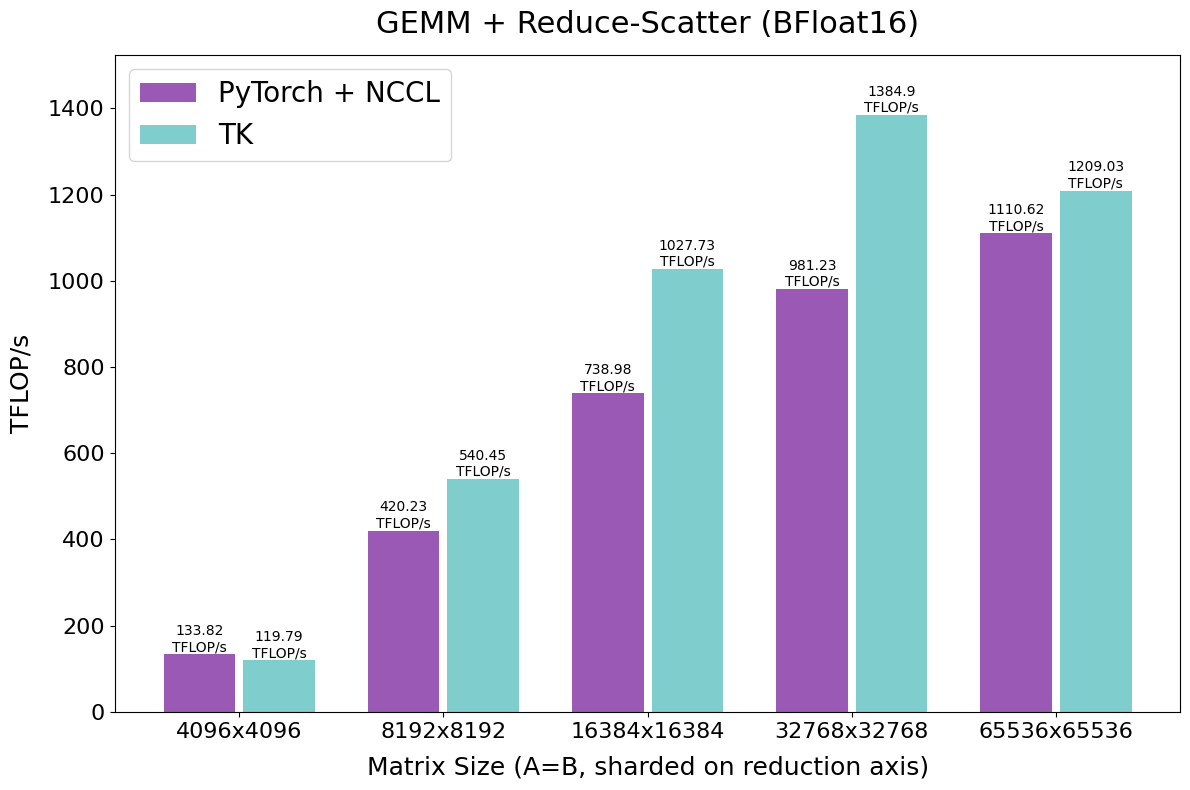

In [7]:
title = "GEMM + Reduce-Scatter (BFloat16)"

X_label = 'Matrix Size (A=B, sharded on reduction axis)'
Y_label = 'TFLOP/s'
Y1_label = 'PyTorch + NCCL'
Y2_label = 'TK'

X = ['4096x4096', '8192x8192', '16384x16384', '32768x32768', '65536x65536']
Y1 = [133.82, 420.23, 738.98, 981.23, 1110.62]
Y2 = [119.79, 540.45, 1027.73, 1384.90, 1209.03]

logscale = False
Y_unit = '\nTFLOP/s'

draw_graph(title, X_label, Y_label, Y1_label, Y2_label, X, Y1, Y2, logscale, Y_unit, True, margin_top=1.1)